In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
class Shared(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(168, 1)
        
    def conv_forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        return x
        
    def forward(self, x):
        x1 = x[:,:1,:]
        x2 = x[:,1:2,:]
        
        x1 = self.conv_forward(x1)
        x2 = self.conv_forward(x2)
        
        x = self.fc3(torch.cat((x1, x2), dim=1))
        
        return x

In [14]:
shared = Shared()

In [15]:
from dataloading import load_data

In [16]:
trainloader, testloader = load_data()

In [17]:
learning_rate = .001

criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(baseline.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(shared.parameters(), lr=learning_rate)

In [18]:
epochs = 5

losses = []

for epoch in range(epochs):
    running_loss = 0.0
    epoch_losses = []
    
    for i, data in enumerate(trainloader, 0):
        inputs, target, classes = data
        
        optimizer.zero_grad()
        
        outputs = shared(inputs)
        outputs = outputs.squeeze()
        
        loss = criterion(outputs, target.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        epoch_losses.append(loss.item())
    
    epoch_loss = torch.mean(torch.tensor(epoch_losses))
    print(f'epoch: {epoch}, loss: {epoch_loss}')
    losses.append(epoch_loss)  

epoch: 0, loss: 0.587638258934021
epoch: 1, loss: 0.38009825348854065
epoch: 2, loss: 0.2825091779232025
epoch: 3, loss: 0.2575467824935913
epoch: 4, loss: 0.20168949663639069


In [19]:
from evaluate import evaluate_model

evaluate_model(shared, testloader)

Accuracy: 0.8539999723434448


tensor(0.8540)

In [32]:
from evaluate import evaluate_model

l = []
a = []

epochs = 30

for round in range(20):
    print('####################################################')
    print(f'Round: {round}')
    print('####################################################')
    
    model = Shared()
    
    trainloader, testloader = load_data()
    
    learning_rate = .001

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    accs = []

    for epoch in range(epochs):
        running_loss = 0.0
        epoch_losses = []

        for i, data in enumerate(trainloader, 0):
            inputs, target, classes = data

            optimizer.zero_grad()

            outputs = model(inputs)
            outputs = outputs.squeeze()

            loss = criterion(outputs, target.float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            epoch_losses.append(loss.item())

        epoch_loss = torch.mean(torch.tensor(epoch_losses))
        print(f'epoch: {epoch}, loss: {epoch_loss}')
        losses.append(epoch_loss) 
        
        acc = evaluate_model(model, testloader)
        accs.append(acc)
    
    l.append(losses)
    a.append(accs)

####################################################
Round: 0
####################################################
epoch: 0, loss: 0.751796543598175
Accuracy: 0.8130000233650208
epoch: 1, loss: 0.375948429107666
Accuracy: 0.8379999995231628
epoch: 2, loss: 0.3037072718143463
Accuracy: 0.8460000157356262
epoch: 3, loss: 0.2518547773361206
Accuracy: 0.878000020980835
epoch: 4, loss: 0.18771019577980042
Accuracy: 0.8579999804496765
epoch: 5, loss: 0.13673135638237
Accuracy: 0.8479999899864197
epoch: 6, loss: 0.10831480473279953
Accuracy: 0.871999979019165
epoch: 7, loss: 0.07768963277339935
Accuracy: 0.8769999742507935
epoch: 8, loss: 0.06653264164924622
Accuracy: 0.8429999947547913
epoch: 9, loss: 0.06367465108633041
Accuracy: 0.8460000157356262
epoch: 10, loss: 0.03576710447669029
Accuracy: 0.8610000014305115
epoch: 11, loss: 0.022714976221323013
Accuracy: 0.8650000095367432
epoch: 12, loss: 0.00672396644949913
Accuracy: 0.8669999837875366
epoch: 13, loss: 0.0060958233661949635
Accuracy

Accuracy: 0.8429999947547913
epoch: 27, loss: 0.00017499472596682608
Accuracy: 0.8460000157356262
epoch: 28, loss: 0.00017092519556172192
Accuracy: 0.8460000157356262
epoch: 29, loss: 0.00015272421296685934
Accuracy: 0.847000002861023
####################################################
Round: 4
####################################################
epoch: 0, loss: 1.0276226997375488
Accuracy: 0.7260000109672546
epoch: 1, loss: 0.40400516986846924
Accuracy: 0.8180000185966492
epoch: 2, loss: 0.3368474245071411
Accuracy: 0.7870000004768372
epoch: 3, loss: 0.3066166639328003
Accuracy: 0.8420000076293945
epoch: 4, loss: 0.2702041268348694
Accuracy: 0.8339999914169312
epoch: 5, loss: 0.22704580426216125
Accuracy: 0.8410000205039978
epoch: 6, loss: 0.17401212453842163
Accuracy: 0.8519999980926514
epoch: 7, loss: 0.14372751116752625
Accuracy: 0.8349999785423279
epoch: 8, loss: 0.09542857110500336
Accuracy: 0.8209999799728394
epoch: 9, loss: 0.12302514165639877
Accuracy: 0.8500000238418579
epoc

Accuracy: 0.8339999914169312
epoch: 23, loss: 0.00021409567852970213
Accuracy: 0.8349999785423279
epoch: 24, loss: 0.00019615974451880902
Accuracy: 0.8349999785423279
epoch: 25, loss: 0.00017030775779858232
Accuracy: 0.8360000252723694
epoch: 26, loss: 0.00015980830357875675
Accuracy: 0.8339999914169312
epoch: 27, loss: 0.00016213857452385128
Accuracy: 0.8349999785423279
epoch: 28, loss: 0.0001438972685718909
Accuracy: 0.8360000252723694
epoch: 29, loss: 0.00013713615771848708
Accuracy: 0.8349999785423279
####################################################
Round: 8
####################################################
epoch: 0, loss: 0.9952659606933594
Accuracy: 0.7609999775886536
epoch: 1, loss: 0.4358908534049988
Accuracy: 0.8220000267028809
epoch: 2, loss: 0.33009636402130127
Accuracy: 0.8309999704360962
epoch: 3, loss: 0.2687222361564636
Accuracy: 0.8339999914169312
epoch: 4, loss: 0.20999042689800262
Accuracy: 0.8579999804496765
epoch: 5, loss: 0.1635604202747345
Accuracy: 0.83600

Accuracy: 0.8450000286102295
epoch: 20, loss: 0.012848091311752796
Accuracy: 0.8560000061988831
epoch: 21, loss: 0.011740284040570259
Accuracy: 0.8560000061988831
epoch: 22, loss: 0.004197383299469948
Accuracy: 0.859000027179718
epoch: 23, loss: 0.001828592736274004
Accuracy: 0.8429999947547913
epoch: 24, loss: 0.0007592058391310275
Accuracy: 0.8510000109672546
epoch: 25, loss: 0.00043679855298250914
Accuracy: 0.8519999980926514
epoch: 26, loss: 0.00034108362160623074
Accuracy: 0.8550000190734863
epoch: 27, loss: 0.0002893361961469054
Accuracy: 0.8550000190734863
epoch: 28, loss: 0.0002594046527519822
Accuracy: 0.8550000190734863
epoch: 29, loss: 0.0002524613810237497
Accuracy: 0.8560000061988831
####################################################
Round: 12
####################################################
epoch: 0, loss: 0.8521668910980225
Accuracy: 0.7400000095367432
epoch: 1, loss: 0.4470677673816681
Accuracy: 0.8069999814033508
epoch: 2, loss: 0.3607684373855591
Accuracy: 0.800

epoch: 16, loss: 0.014282905496656895
Accuracy: 0.8519999980926514
epoch: 17, loss: 0.004936014302074909
Accuracy: 0.8429999947547913
epoch: 18, loss: 0.002270345576107502
Accuracy: 0.8450000286102295
epoch: 19, loss: 0.0012332684127613902
Accuracy: 0.847000002861023
epoch: 20, loss: 0.0008679470047354698
Accuracy: 0.8450000286102295
epoch: 21, loss: 0.0007119171204976737
Accuracy: 0.8450000286102295
epoch: 22, loss: 0.0006161232595331967
Accuracy: 0.8429999947547913
epoch: 23, loss: 0.0005356122856028378
Accuracy: 0.8450000286102295
epoch: 24, loss: 0.0004843519127462059
Accuracy: 0.843999981880188
epoch: 25, loss: 0.00042821254464797676
Accuracy: 0.843999981880188
epoch: 26, loss: 0.00038215183303691447
Accuracy: 0.8460000157356262
epoch: 27, loss: 0.000347521883668378
Accuracy: 0.843999981880188
epoch: 28, loss: 0.00032223318703472614
Accuracy: 0.8450000286102295
epoch: 29, loss: 0.0002926071174442768
Accuracy: 0.8450000286102295
####################################################


epoch: 13, loss: 0.04960807040333748
Accuracy: 0.828000009059906
epoch: 14, loss: 0.04484868422150612
Accuracy: 0.8320000171661377
epoch: 15, loss: 0.03814152628183365
Accuracy: 0.8349999785423279
epoch: 16, loss: 0.0348881296813488
Accuracy: 0.8180000185966492
epoch: 17, loss: 0.05530828982591629
Accuracy: 0.8489999771118164
epoch: 18, loss: 0.04461769387125969
Accuracy: 0.8450000286102295
epoch: 19, loss: 0.018564498052001
Accuracy: 0.8640000224113464
epoch: 20, loss: 0.05724412947893143
Accuracy: 0.843999981880188
epoch: 21, loss: 0.026630982756614685
Accuracy: 0.8569999933242798
epoch: 22, loss: 0.009871595539152622
Accuracy: 0.8510000109672546
epoch: 23, loss: 0.0024994956329464912
Accuracy: 0.8569999933242798
epoch: 24, loss: 0.0010973664466291666
Accuracy: 0.8619999885559082
epoch: 25, loss: 0.00032307638321071863
Accuracy: 0.8619999885559082
epoch: 26, loss: 0.00024192479031626135
Accuracy: 0.8619999885559082
epoch: 27, loss: 0.0001995642960537225
Accuracy: 0.8619999885559082
e

In [33]:
aa = torch.tensor(a)

max_a, _ = torch.max(aa, dim=-1)

i = torch.argmax(max_a)

maxmax_a = torch.max(max_a)
min_a = torch.min(max_a)
std_a = torch.std(max_a)

print(min_a, maxmax_a, std_a)

tensor(0.8380) tensor(0.8780) tensor(0.0118)


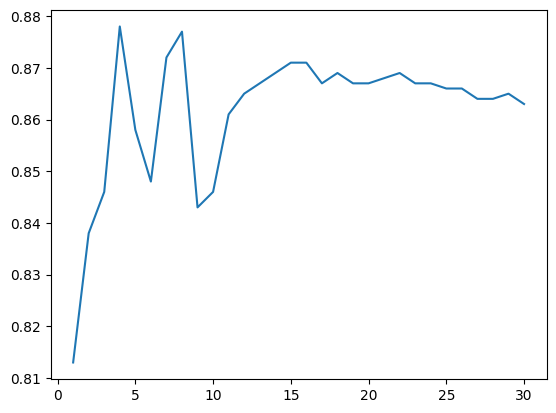

In [34]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = a[i]

plt.plot(x, y)
plt.show()

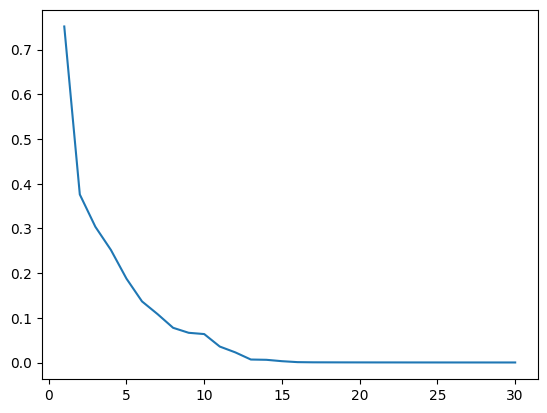

In [35]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = l[i]

plt.plot(x, y)
plt.show()

In [36]:
print(torch.tensor(a[i]).tolist())
print(torch.tensor(l[i]).tolist())

[0.8130000233650208, 0.8379999995231628, 0.8460000157356262, 0.878000020980835, 0.8579999804496765, 0.8479999899864197, 0.871999979019165, 0.8769999742507935, 0.8429999947547913, 0.8460000157356262, 0.8610000014305115, 0.8650000095367432, 0.8669999837875366, 0.8690000176429749, 0.8709999918937683, 0.8709999918937683, 0.8669999837875366, 0.8690000176429749, 0.8669999837875366, 0.8669999837875366, 0.8679999709129333, 0.8690000176429749, 0.8669999837875366, 0.8669999837875366, 0.8659999966621399, 0.8659999966621399, 0.8640000224113464, 0.8640000224113464, 0.8650000095367432, 0.8629999756813049]
[0.751796543598175, 0.375948429107666, 0.3037072718143463, 0.2518547773361206, 0.18771019577980042, 0.13673135638237, 0.10831480473279953, 0.07768963277339935, 0.06653264164924622, 0.06367465108633041, 0.03576710447669029, 0.022714976221323013, 0.00672396644949913, 0.0060958233661949635, 0.003001550678163767, 0.0008877581567503512, 0.00048598420107737184, 0.00039977108826860785, 0.00032713956898078